### Lösung zu Blatt 5 Aufgabe 1

In [59]:
import numpy as np

m = 11
keys = [10,22,31,4,15,28,17,88,59]

#hashfunctions
def h(k):
    return k % m

def h2(k):
    return 1 + (k % (m-1))


#probing functions
def linear(i, k):
    return (h(k)+i) % m

def quadratic(i, k):
    return (h(k) + i + 3*i*i) % m

def double(i, k):
    return (h(k) + i*h2(k)) % m #why is this a permutation of all m slots?


#testing
def insert_keys(probing, keys, m):
    HT = [-1]*m
    num_fails = 0
    for k in keys:
        for i in range(m):
            j = probing(i, k)
            if HT[j] == -1:
                HT[j] = k
                break
            else:
                num_fails += 1
    return HT, num_fails
    

print("Linear:")
HT, num_fails = insert_keys(linear, keys, m)
print(HT)
print("Number of fails = ", num_fails)
print("Quadratic:")
HT, num_fails = insert_keys(quadratic, keys, m)
print(HT)
print("Number of fails = ", num_fails)
print("Double:")
HT, num_fails = insert_keys(double, keys, m)
print(HT)
print("Number of fails = ", num_fails)


#iters-mal ein Zufallsexperiment durchführen und Ergebnisse mitteln:
#5 i.i.d. Zahlen aus range(60) ziehen und mit allen 3 probings in eine 
#Hashtabelle der Größe m=11 einfügen
iters = 100000
sum_fails_linear = 0
sum_fails_quadratic = 0
sum_fails_double = 0
for _ in range(iters):
    keys = np.random.randint(60, size=5)
    _, fl = insert_keys(linear, keys, m)
    _, fq = insert_keys(quadratic, keys, m)
    _, fd = insert_keys(double, keys, m)
    sum_fails_linear += fl
    sum_fails_quadratic += fq
    sum_fails_double += fd
print("Linear average fails = ", sum_fails_linear/iters)
print("Quadratic average fails = ", sum_fails_quadratic/iters)
print("Double average fails = ", sum_fails_double/iters)

Linear:
[22, 88, -1, -1, 4, 15, 28, 17, 59, 31, 10]
Number of fails =  7
Quadratic:
[22, -1, 88, 17, 4, -1, 28, 59, 15, 31, 10]
Number of fails =  14
Double:
[22, -1, 59, 17, 4, 15, 28, 88, -1, 31, 10]
Number of fails =  7
Linear average fails =  1.22344
Quadratic average fails =  1.21238
Double average fails =  1.13655


### Effekt von Hashtable-size Reservierungen Aufgabe 2

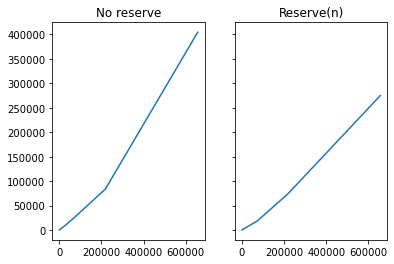

In [22]:
import matplotlib.pyplot as plt

#n = Anzahl Einfügungen, m = Anzahl Suchen
#jeweils m = 100 fest, Suchen hat kaum Effekt auf Zeit

n = [900, 2700, 8100, 24300, 72900, 218700, 656100]
t1 = [330, 878, 2808, 7832, 25993, 83820, 404569]
t2 = [240, 686, 2198, 6046, 18371, 74122, 275105]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('No reserve')
ax2.set_title('Reserve(n)')
ax1.plot(n, t1)
ax2.plot(n, t2)

plt.show()

#Man kann in C++ mit set.reserve(n) die Größe der Hashtabelle reservieren,
#wenn man die Anzahl der Einfügungen n vorher abschätzen kann.
#Ohne Reservierung der Tabellengröße (links), ist der Trend steiler,
#weil eine Einfügung eine Regeneration (Tabelle vergrößert sich) bewirken kann.
#Dann müssen alle bisher eingefügten Elemente kopiert werden.
#Im worst case ist das quadratisch!